### EDA

In [6]:
%pwd


'C:\\Users\\LG\\Desktop\\jnotebook_file\\바탕화면_jupyterfile'

In [1]:
import pandas as pd
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [221]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [222]:
combine=[train,test]

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.shape

(891, 12)

In [12]:
test.shape

(418, 11)

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

train데이터 age, cabin, embarked에 missing values 존재

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

test데이터 age, fare, cabin에 missing values 존재

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McMahon, Mr. Martin",male,1601,B96 B98,S
freq,1,577,7,4,644


## 1. 변수 탐색 

### 1. Pclass

In [16]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


티겟 등급이 높을수록 생존확률이 올라가므로 pclass는 유의한 변수로 보임 

### 2. Sex

In [17]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여성의 생존확률이 확연히 높으며, sex는 유의한 변수로 보임

### 3. SibSp

In [18]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


배우자, 자매 수가 적을수록 생존확률이 낮은 경향을 보임. 유의성 여부는 검증이 필요.

### 4. Parch

In [3]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


부모, 어린아이 수가 적을수록 생존확률이 낮은 경향을 보임. 유의성 여부는 검증이 필요.

### 5. Age

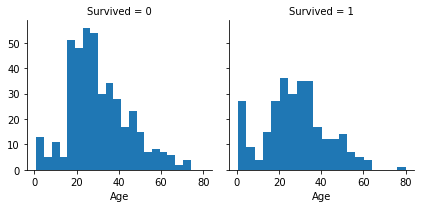

In [22]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

10살 미만의 어린 아이들,30대 중후반 이상의 나이대 일때 생존한 경우가 상대적으로 많음. age도 유의한 영향을 미치는 것으로 보임

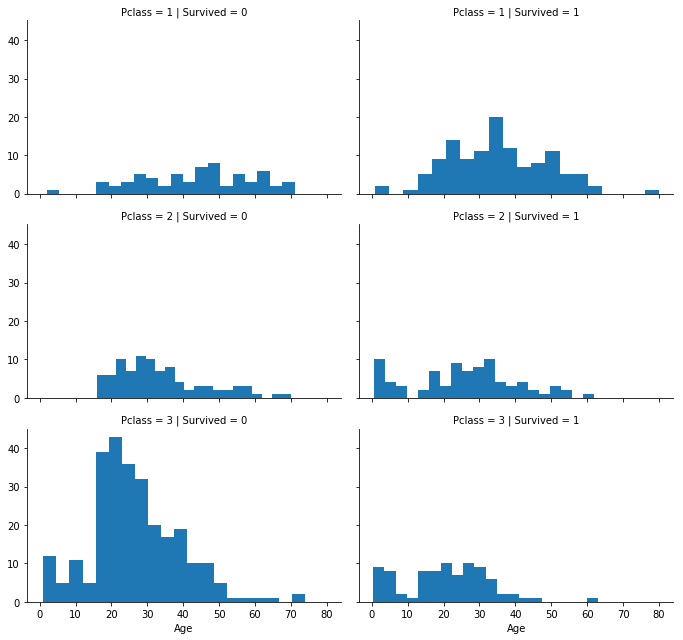

In [25]:
g=sns.FacetGrid(train,col='Survived',row='Pclass',aspect=1.6)
g.map(plt.hist,'Age',bins=20)

### 6. ticket

In [223]:
print('Before',train.shape,test.shape)
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)
combine=[train,test]
"After",train.shape,test.shape

Before (891, 12) (418, 11)


('After', (891, 11), (418, 10))

티켓 번호를 의미하는 ticket 변수는 생존여부와 연관성이 없으므로 삭제한다.

### 7. Fare  

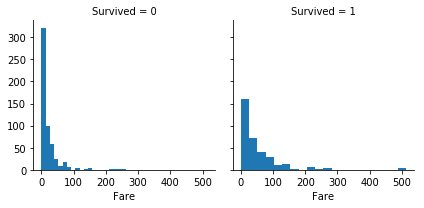

In [285]:
g=sns.FacetGrid(train_c,col='Survived')
g.map(plt.hist,'Fare',bins=20)

생존하지 못한 승객 대다수의 요금이 50달러 미만으로 생존한 승객들과 큰 차이를 보임. 생존여부에 유의한 영향을 미친다고 볼 수 있음.

### 8. Cabin 

객실 넘버는 타이타닉 호 탈출의 용이함과 직결되므로 유의 할것으로 보이며 pclass와 상관성이 있을것으로 보임 

In [ ]:
for dataset in combine:
    dataset['cabin_type']=dataset['Cabin'].astype(str).str[0]
    cabin_type.value_counts()

cabin은 '알파벳+숫자' 조합으로 구성되어있으며 알파벳이 pclass와 유의한 상관성이 있는 것으로 보임 

In [47]:
train['Survived'].groupby([train['cabin_type'],train['Pclass']]).mean().unstack('Pclass')

Pclass,1,2,3
cabin_type,,,
A,0.466667,NaN,NaN
B,0.744681,NaN,NaN
C,0.593220,NaN,NaN
D,0.758621,0.750000,NaN
E,0.720000,0.750000,1.000000
F,NaN,0.875000,0.200000
G,NaN,NaN,0.500000
T,0.000000,NaN,NaN
n,0.475000,0.440476,0.235908


A, B, C, D, E 객실의 경우 대부분 1등석으로 pclass와 관련이 있음. 1등석 승객의 일부가 대부분의 2,3 등석 승객의 객실인 n 객실을 배당 받은 것이 특이점이며 해당 승객들의 생존률은 확연히 낮다. 이에 Pclass를 다르게 정의하는 방법도 모델 성능 향상에 도움이 될 것으로 보임   

In [48]:
pd.crosstab(train['cabin_type'],train['Pclass'])

Pclass,1,2,3
cabin_type,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
T,1,0,0
n,40,168,479


### 9. Embarked

In [14]:
train[['Survived','Embarked']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


cherbourg에서 승선한 승객이 Queenstown과 Southampton에서 승선한 경우보가 확연히 생존률이 높았음. 이에 대한 검증과 원인 찾기가 필요함  

## 새로운 변수 만들기 

### 1. title 

In [50]:
train['Name'][0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [224]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [225]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Survived','Title']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [226]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [227]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 10))

In [228]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0})
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


## missing value 처리

### 1.Age

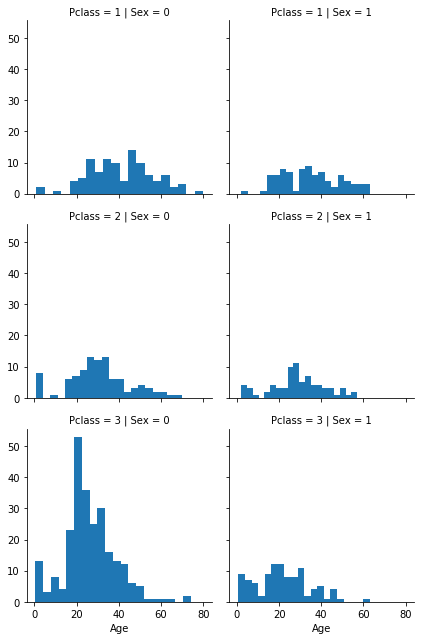

In [229]:
grid =sns.FacetGrid(train,row="Pclass",col="Sex")
grid.map(plt.hist,'Age',bins=20)

In [77]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [78]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [230]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age']
            age_guess=guess_df.median()
             # Convert random age float to nearest .5 age
            guess_ages[i,j] = age_guess
            print(age_guess)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull())&(dataset['Sex']==i)&\
                             (dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset['Age'] = dataset['Age']

40.0
30.0
25.0
35.0
28.0
21.5
42.0
28.0
24.0
41.0
24.0
22.0


In [231]:
guess_ages

array([[42., 28., 24.],
       [41., 24., 22.]])

In [232]:
train['Ageband']=pd.cut(train['Age'],5)
train[['Ageband','Survived']].groupby(['Ageband'],as_index=False).mean().sort_values(by='Ageband',ascending=True)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [234]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Ageband
0,0,3,0,1.0,1,0,7.2500,NaN,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C85,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,NaN,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,C123,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,NaN,S,1,"(32.252, 48.168]"


In [235]:
train = train.drop(['Ageband'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,NaN,S,1
1,1,1,1,2.0,1,0,71.2833,C85,C,3
2,1,3,1,1.0,0,0,7.9250,NaN,S,2
3,1,1,1,2.0,1,0,53.1000,C123,S,3
4,0,3,0,2.0,0,0,8.0500,NaN,S,1


In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


### 2. Embarked, Fare

Embarked, Fare 두 변수의 경우 missing 값이 소수인 2,1개 이므로 최빈값, 미디언 값으로 넣어준다.

In [237]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [238]:
round(test['Fare'].mean(),4)

35.6272

In [239]:
test['Fare']=test['Fare'].fillna(round(test['Fare'].mean(),4))

In [240]:
train['Embarked'].isnull().sum()
test['Fare'].isnull().sum()

0

Embarked 변수값을 숫자로 바꾸어준다.

In [241]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({"S":0,"C":1,"Q":2}).astype(int)

### 3. Cabin

cabin 결측치가 많으므로 cabin 변수를 제외한다.

In [242]:
train = train.drop(['Cabin'], axis=1)
test=test.drop(['Cabin'],axis=1)
combine = [train, test]

### SibSp,Parch 삭제

가족수를 의미하는 familysize 변수를 만들것이므로 SibSp, Parch 변수를 삭제한다.

In [261]:
train = train.drop(['SibSp','Parch'], axis=1)
test=test.drop(['SibSp','Parch'],axis=1)
combine = [train, test]

## 새로운 변수 만들기 

### 1. family size

In [243]:
for dataset in combine:
    dataset['Familysize']=dataset['SibSp']+dataset['Parch']+1
train[['Familysize','Survived']].groupby(['Familysize'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


isalone변수를 만들어 familysize가 1인 사람을 지정해 준다

In [244]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Familysize']==1,'IsAlone'] = 1
train[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### 2. Fareband

In [253]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [254]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone
0,0,3,0,1.0,1,0,0,0,1,2,0
1,1,1,1,2.0,1,0,3,1,3,2,0
2,1,3,1,1.0,0,0,1,0,2,1,1
3,1,1,1,2.0,1,0,3,0,3,2,0
4,0,3,0,2.0,0,0,1,0,1,1,1
5,0,3,0,1.0,0,0,1,2,1,1,1
6,0,1,0,3.0,0,0,3,0,1,1,1
7,0,3,0,0.0,3,1,2,0,4,5,0
8,1,3,1,1.0,0,2,1,0,3,3,0
9,1,2,1,0.0,1,0,2,1,3,2,0


# Model 

### 1. Logistic Regression

In [262]:
Y_train=train['Survived']
X_train=train.drop("Survived",axis=1)
X_test=test.drop("PassengerId",axis=1)
X_train.shape,Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [268]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

c:\users\lg\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.47

In [270]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.161231
5,Title,0.466599
4,Embarked,0.261096
3,Fare,0.217434
2,Age,-0.034049
6,Familysize,-0.392914
7,IsAlone,-0.483855
0,Pclass,-0.701721


### 2. KNN

In [275]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

85.52

### 3. RandomForest

In [277]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

88.66

# 모델 평가

In [280]:
models = pd.DataFrame({'Model':['LogisticRegression','KNN','RandomForest'],'Score':[acc_log,acc_knn,acc_random_forest]})
models

,Model,Score
0,LogisticRegression,80.47
1,KNN,85.52
2,RandomForest,88.66


In [282]:
submission=pd.DataFrame({"PassengerId":test['PassengerId'],"Survived":Y_pred})
submission.to_csv('190728_submission.csv', index=False)